In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("University_Clustering.xlsx")
df.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   State     25 non-null     object
 2   SAT       25 non-null     int64 
 3   Top10     25 non-null     int64 
 4   Accept    25 non-null     int64 
 5   SFRatio   25 non-null     int64 
 6   Expenses  25 non-null     int64 
 7   GradRate  25 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.7+ KB


In [4]:
df.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [5]:
df.drop(['State'],axis=1,inplace=True)


In [6]:
new_df=df.iloc[:,1:] # ways to drop
new_df.head(2)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
ss=StandardScaler()
for cols in new_df:
    new_df[cols]=ss.fit_transform(new_df[[cols]])
    

In [9]:
new_df.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587


In [10]:
from sklearn.cluster import KMeans

In [11]:
wcss=[]
clusters=list(range(1,6))
for i in clusters:
    kmodel=KMeans(n_clusters=i)
    kmodel.fit(new_df)
    wcss.append(kmodel.inertia_)

In [12]:
print(clusters)
wcss

[1, 2, 3, 4, 5]


[150.0,
 64.1452839501027,
 44.531761731450956,
 34.79612750585774,
 27.254316529113016]

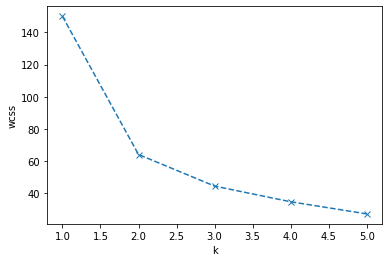

In [13]:
plt.figure()
plt.plot(clusters,wcss,'x--')
plt.xlabel("k")
plt.ylabel("wcss")
plt.show()

In [14]:
kmodel=KMeans(n_clusters=3)
kmodel.fit(new_df)

KMeans(n_clusters=3)

In [15]:
kmodel.labels_

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 1, 2], dtype=int32)

In [16]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [17]:
df["labels"]=kmodel.labels_

In [18]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,labels
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0


In [19]:
df[df["labels"]==0]["Univ"]

0            Brown
2              CMU
3         Columbia
4          Cornell
7       Georgetown
11    Northwestern
12       NotreDame
18      UCBerkeley
19        UChicago
20       UMichigan
21           UPenn
22             UVA
Name: Univ, dtype: object

In [20]:
df[df["labels"]==1]["Univ"]

13     PennState
15        Purdue
17      TexasA&M
23    UWisconsin
Name: Univ, dtype: object

In [21]:
df[df["labels"]==2]["Univ"]

1          CalTech
5        Dartmouth
6             Duke
8          Harvard
9     JohnsHopkins
10             MIT
14       Princeton
16        Stanford
24            Yale
Name: Univ, dtype: object

In [22]:
import scipy.cluster.hierarchy as sch 
from scipy.cluster.hierarchy import linkage

In [23]:
new_df.head(2)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524


In [24]:
df.head(2)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,labels
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,2


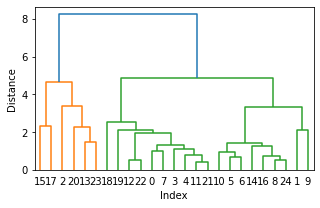

In [26]:
z=linkage(new_df,method="complete",metric="euclidean")
plt.figure(figsize=(5,3))
plt.xlabel("Index")
plt.ylabel("Distance")
sch.dendrogram(z,leaf_rotation=0,leaf_font_size=10)
plt.show()

In [28]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=3,linkage="complete",affinity="euclidean")
model.fit(new_df)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [29]:
model.labels_

array([2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 2,
       2, 0, 1])

In [33]:
df["HC_label"]=model.labels_

In [34]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,labels,HC_label
0,Brown,1310,89,22,13,22704,94,0,2
1,CalTech,1415,100,25,6,63575,81,2,1
2,CMU,1260,62,59,9,25026,72,0,0
3,Columbia,1310,76,24,12,31510,88,0,2
4,Cornell,1280,83,33,13,21864,90,0,2
5,Dartmouth,1340,89,23,10,32162,95,2,1
6,Duke,1315,90,30,12,31585,95,2,1
7,Georgetown,1255,74,24,12,20126,92,0,2
8,Harvard,1400,91,14,11,39525,97,2,1
9,JohnsHopkins,1305,75,44,7,58691,87,2,1
